In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

## Comparison ##

In [2]:
3 > 1

True

In [3]:
type(3 > 1)

bool

In [4]:
True

True

In [5]:
true

NameError: name 'true' is not defined

(We see that capitalization matters.)

In [6]:
3 = 3

SyntaxError: cannot assign to literal (3802935557.py, line 1)

In [7]:
3 == 3.0

True

In [8]:
10 != 2

True

In [9]:
x = 14
y = 3

In [10]:
x > 15

False

In [11]:
12 < x

True

In [12]:
x < 20

True

In [13]:
12 < x < 20

True

In [14]:
10 < x-y < 13

True

In [15]:
x > 13 and y < 3.14159

True

(The comparison `12 < x < 20` is equivalent to `12 < x and x < 20`.)

## Comparisons with arrays

In [16]:
pets = make_array('cat', 'cat', 'dog', 'cat', 'dog', 'rabbit')

In [17]:
pets == 'cat'

array([ True,  True, False,  True, False, False], dtype=bool)

In [18]:
1 + 1 + 0 + 1 + 0 + 0

3

In [19]:
sum(make_array(True, True, False, True, False, False))

3

In [20]:
sum(pets == 'dog')

2

In [21]:
np.count_nonzero(pets == 'dog')

2

In [22]:
x = np.arange(20, 31)

In [23]:
x > 28

array([False, False, False, False, False, False, False, False, False,
        True,  True], dtype=bool)

### Conditional Statements

In [24]:
x = 20

In [25]:
if x >= 18:
    print('You can legally vote.')

You can legally vote.


In [26]:
if x >= 21:
    print('You can legally drink.')

## Simulation

Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

### Conditional Statements

In [27]:
# Work in progress
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1

In [28]:
one_round(4, 3)

1

In [29]:
one_round(2, 6)

In [30]:
# Final correct version
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1
    elif your_roll > my_roll:
        return -1
    elif your_roll == my_roll:
        return 0

In [31]:
one_round(1, 1)

0

In [32]:
one_round(6, 5)

1

In [33]:
one_round(7, -1)

1

### Random Selection

In [34]:
mornings = make_array('wake up', 'sleep in')

In [35]:
np.random.choice(mornings)

'sleep in'

In [36]:
np.random.choice(mornings)

'wake up'

In [37]:
np.random.choice(mornings)

'wake up'

We can also pass an argument that specifies how many times to make a random choice:

In [38]:
np.random.choice(mornings, 7)

array(['wake up', 'wake up', 'sleep in', 'wake up', 'wake up', 'sleep in',
       'sleep in'],
      dtype='<U8')

In [39]:
sum(np.random.choice(mornings, 7) == 'wake up')

4

In [40]:
sum(np.random.choice(mornings, 7) == 'sleep in')

4

In [41]:
morning_week = np.random.choice(mornings, 7)
morning_week

array(['sleep in', 'sleep in', 'sleep in', 'wake up', 'sleep in',
       'sleep in', 'wake up'],
      dtype='<U8')

In [42]:
sum(morning_week == 'wake up')

2

In [43]:
sum(morning_week == 'sleep in')

5

### Simulating the roll of a die

In [44]:
die_faces = np.arange(1, 7)

In [45]:
np.random.choice(die_faces)

4

In [46]:
def simulate_one_round():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)
    return one_round(my_roll, your_roll)

In [47]:
simulate_one_round()

-1

### Appending Arrays

In [48]:
first = np.arange(4)
second = np.arange(10, 17)

In [49]:
np.append(first, 6)

array([0, 1, 2, 3, 6])

In [50]:
first

array([0, 1, 2, 3])

In [51]:
np.append(first, second)

array([ 0,  1,  2,  3, 10, 11, 12, 13, 14, 15, 16])

In [52]:
first

array([0, 1, 2, 3])

In [53]:
second

array([10, 11, 12, 13, 14, 15, 16])

### Repeated Betting ###

In [54]:
results = make_array()

In [55]:
results = np.append(results, simulate_one_round())
results

array([ 1.])

In [56]:
results = np.append(results, simulate_one_round())
results

array([ 1.,  1.])

## `For` Statements

In [57]:
for pet in make_array('cat', 'dog', 'rabbit'):
    print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


In [58]:
pet = make_array('cat', 'dog', 'rabbit').item(0)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(1)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(2)
print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


In [59]:
game_outcomes = make_array()

for i in np.arange(5):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes

array([-1.,  1.,  0., -1., -1.])

In [60]:
game_outcomes = make_array()

for i in np.arange(10000):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes

array([ 1., -1.,  1., ...,  1.,  0.,  1.])

In [61]:
len(game_outcomes)

10000

In [62]:
results = Table().with_column('My winnings', game_outcomes)

In [63]:
results

My winnings
1
-1
1
-1
-1
-1
1
1
1
1


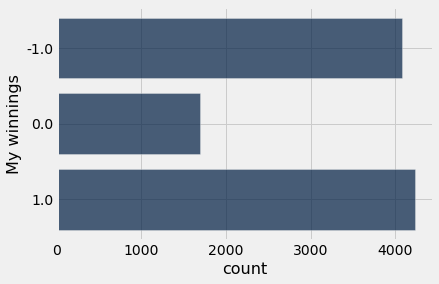

In [64]:
results.group('My winnings').barh('My winnings')

In [65]:
# Bonus question: This simulation is relatively simple. 
# Can you find a way to run it without using a for loop?

### Another example: simulating heads in 100 coin tosses

In [66]:
coin = make_array('heads', 'tails')

In [67]:
sum(np.random.choice(coin, 100) == 'heads')

51

In [68]:
# Simulate one outcome

def num_heads():
    return sum(np.random.choice(coin, 100) == 'heads')

In [69]:
# Decide how many times you want to repeat the experiment

repetitions = 10000

In [70]:
# Simulate that many outcomes

outcomes = make_array()

for i in np.arange(repetitions):
    outcomes = np.append(outcomes, num_heads())

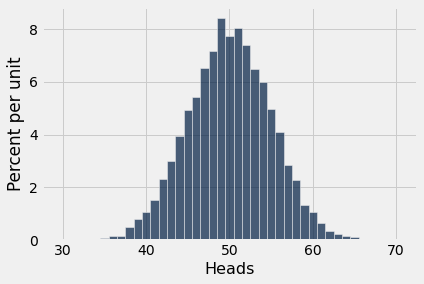

In [71]:
heads = Table().with_column('Heads', outcomes)
heads.hist(bins = np.arange(29.5, 70.6))

## Optional: Advanced `where` ##

In [72]:
ages = make_array(16, 22, 18, 15, 19, 15, 16, 21)
age = Table().with_column('Age', ages)

In [73]:
age

Age
16
22
18
15
19
15
16
21


In [74]:
age.where('Age', are.above_or_equal_to(18))

Age
22
18
19
21


In [75]:
voter = ages >= 18

In [76]:
voter

array([False,  True,  True, False,  True, False, False,  True], dtype=bool)

In [77]:
age.where(voter)

Age
22
18
19
21


In [78]:
is_voter = are.above_or_equal_to(18)

In [79]:
type(is_voter)

datascience.predicates._combinable

In [80]:
is_voter(22)

True

In [81]:
is_voter(3)

False

In [82]:
age.apply(is_voter, 'Age')

array([False,  True,  True, False,  True, False, False,  True], dtype=bool)

In [83]:
ages >= 18

array([False,  True,  True, False,  True, False, False,  True], dtype=bool)

In [84]:
voter

array([False,  True,  True, False,  True, False, False,  True], dtype=bool)

In [85]:
def my_voter_function(x):
    return x >= 18

In [86]:
age.where('Age', are.above_or_equal_to(18))

Age
22
18
19
21


In [87]:
age.where(voter)

Age
22
18
19
21


In [88]:
age.where('Age', my_voter_function)

Age
22
18
19
21
